# ENEM 2019 - Experimento Machine Learning - Análise Exploratória de Dados (Dados Categóricos)

## Análise Exploratória de Dados
Esta é uma técnica inicial muito comum e, ao mesmo tempo, essencial para qualquer trabalho de machine learning.

O objetivo é entender como os dados estão organizados, conhecer cada **feature** em termos de distribuição, presença de dados **missing**, **outliers** e medidas estatisticas que detalhem melhor os dados.

### Carregando o conjunto de dados e avaliando a estrutura

In [1]:
import pandas as pd

### Explorando os dados da nota da redação
Após o pré-processamento temos agora uma base com 53 colunas (uma redução de 61% no número) e cerca de 3,7M de casos (aproximadamente 73% do conjunto original).

Agora o passo seguinte é explorar as variáveis do conjunto de dados.

Para este conjunto ajustado consideraremos a coluna `NU_NOTA_REDACAO` como variável **dependente**. Esta definição é importante, pois os algorítmos de classificação e regressão necessitam desta variável.



In [3]:
enem2019_dados = pd.read_csv("C:/Sandbox/MICRODADOS_ENEM_2019_interim.csv",  encoding = "ISO-8859-1", sep=',')

Transformando dados string em categorias

In [4]:
categoricos = ['SG_UF_RESIDENCIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 
               'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC',
               'TP_SIT_FUNC_ESC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 
               'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015',
               'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025'
              ]

for campos in categoricos:
    enem2019_dados[campos] = enem2019_dados[campos].astype("category")

Sumário estatístico para entender os grandes números relacionados a `NU_NOTA_REDACAO`

In [5]:
(enem2019_dados['NU_NOTA_REDACAO'].describe())

count    3.702007e+06
mean     5.797694e+02
std      1.825116e+02
min      0.000000e+00
25%      5.000000e+02
50%      5.800000e+02
75%      6.800000e+02
max      1.000000e+03
Name: NU_NOTA_REDACAO, dtype: float64

No ENEM 2019 a média das notas ficou em torno de **580 pontos** com um desvio padrão de **183 pontos**. 
O desvio padrão é um indicativo de quão espalhados os dados estão em relação a média.

Uma análise de distribuição permitirá entender como as notas estão distribuídas dentro do intervalo [0,1000]. Também será possivel avaliar se há assimetria e entender como as notas se comportam nos estremos deste intervalor.

In [6]:
import matplotlib.pyplot as plt

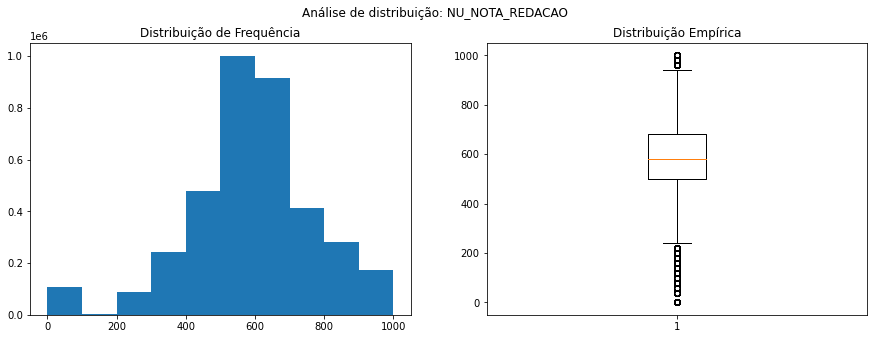

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle('Análise de distribuição: NU_NOTA_REDACAO')

axs[0].set_title('Distribuição de Frequência')
axs[0].hist(enem2019_dados['NU_NOTA_REDACAO'],  bins=10)
axs[1].set_title('Distribuição Empírica')
axs[1].boxplot(enem2019_dados['NU_NOTA_REDACAO'])

plt.show()

In [8]:
import seaborn as sns

C:\Users\edval\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='Density'>

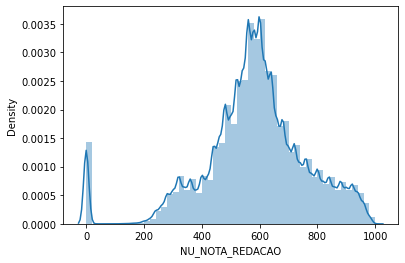

In [9]:
sns.distplot(enem2019_dados['NU_NOTA_REDACAO'])

Em tese, as notas da redação poderiam seguir uma distribuição normal, mas não é o que vemos na prática. Os extremos tem um comportamento peculiar principalmente nas notas que estão entre o intervalo [0,200].


Um descritivo estatístico da variável `NU_NOTA_REDACAO´ ajudará a entender aspectos relacionados com a distribuição e distribuição das notas

In [10]:
import statsmodels.api as sm
import statsmodels.stats.descriptivestats as smdesc

In [11]:
smdesc.describe(data=enem2019_dados['NU_NOTA_REDACAO'], stats=['nobs', 'median', 'mode', 'mean', 
                                                               'std', 'ci', 'skew', 'kurtosis'], 
                alpha=0.05)

,NU_NOTA_REDACAO
nobs,3.702007e+06
mean,5.797694e+02
upper_ci,5.797695e+02
lower_ci,5.797693e+02
std,1.825116e+02
skew,-6.327232e-01
kurtosis,4.464667e+00
mode,6.000000e+02
mode_freq,7.168733e-02
median,5.800000e+02


A nota da redação tem uma pequena assimetria negativa devido ao fato da mdia ser um pouco maior que a média. Outro ponto é a curtose positiva o que significa que o pico é maior do que o observado em uma distribuição normal.

Por fim, um gráfico QQ-Plot ajudará entender se a nota da prova se aproxima de uma curva normal.

In [12]:
from scipy import stats

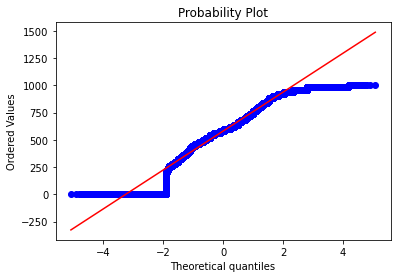

In [13]:
stats.probplot(enem2019_dados['NU_NOTA_REDACAO'], plot=plt)
plt.show()

Como observado anteriormente há desvios percebidos nos extremos da distribuição. Com isso não podemos afirmar que a nota da redação tem uma distribuição normal.

Não vamos remover as notas nas extremidades, pois é do interesse desse experimento entender as notas e isto implica levar em consideração os casos extremos.

### Explorando os dados categóricos

In [14]:
enem2019_dados.head(5)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,15,PA,21,M,1,3,4,1,3,...,A,A,A,C,B,A,D,A,B,A
1,190001004628,15,PA,16,F,1,3,1,3,0,...,A,A,A,B,B,A,B,A,A,A
2,190001004629,15,PA,18,F,1,1,1,2,0,...,B,A,A,D,B,B,D,A,C,B
3,190001004632,15,PA,31,M,1,1,1,1,7,...,A,A,A,B,A,A,D,A,A,A
4,190001004633,15,PA,30,F,2,3,1,1,10,...,A,A,A,B,A,A,B,A,A,B


In [17]:
def Explorar(var_indep, var_dep, df, freq=False, media=False):
    print()
    print('=======================')
    print('Explorando:', var_indep, '(n=', df[var_indep].count(), ')')
    print('=======================')
    if freq:
        print('Freq. Relativa',df.groupby(var_indep)[var_indep].count()/df.shape[0]*100)
        print()
    if media:
        print('Média de ', var_dep, '(', df[var_dep].mean(), ') por ', df.groupby(var_indep).mean()[var_dep])
        print()
    

In [18]:
for campos in categoricos:
    Explorar(var_indep=campos, var_dep='NU_NOTA_REDACAO', df=enem2019_dados, freq=True)



Explorando: SG_UF_RESIDENCIA (n= 3702007 )
Freq. Relativa SG_UF_RESIDENCIA
AC     0.732927
AL     1.857101
AM     2.012044
AP     0.798270
BA     7.812762
CE     5.994532
DF     1.801968
ES     1.954832
GO     3.341998
MA     4.431353
MG    10.618483
MS     1.316880
MT     1.633465
PA     5.613361
PB     3.080653
PE     5.476840
PI     2.545619
PR     4.064336
RJ     6.600204
RN     2.441459
RO     1.104266
RR     0.237682
RS     4.215497
SC     2.137624
SE     1.563611
SP    15.699160
TO     0.913072
Name: SG_UF_RESIDENCIA, dtype: float64


Explorando: TP_SEXO (n= 3702007 )
Freq. Relativa TP_SEXO
F    59.460071
M    40.539929
Name: TP_SEXO, dtype: float64


Explorando: TP_ESTADO_CIVIL (n= 3702007 )
Freq. Relativa TP_ESTADO_CIVIL
0     3.498913
1    88.958611
2     6.037293
3     1.404076
4     0.101107
Name: TP_ESTADO_CIVIL, dtype: float64


Explorando: TP_COR_RACA (n= 3702007 )
Freq. Relativa TP_COR_RACA
0     1.983654
1    37.139557
2    12.242629
3    45.763339
4     2.289434
5   

Explorando: Q023 (n= 3702007 )
Freq. Relativa Q023
A    74.820253
B    25.179747
Name: Q023, dtype: float64


Explorando: Q024 (n= 3702007 )
Freq. Relativa Q024
A    43.829388
B    44.213477
C     8.336289
D     2.557613
E     1.063234
Name: Q024, dtype: float64


Explorando: Q025 (n= 3702007 )
Freq. Relativa Q025
A    21.123029
B    78.876971
Name: Q025, dtype: float64



A frequência relativa das variáveis categóricas permite entender mais a respeito do perfil dos participantes. Durante esta avaliação podemos identificar que algumas variaveis podem ser excluidas do conjunto de dados.

Duas são as razões para tal exclusão:
1. Variáveis consideradas irrelevantes para o experimento
2. Presença do tipo de resposta **Não Respondeu** dificulta qualquer análise ou conclusão a partir de tal informação.

A tabela abaixo apresenta as variáveis agrupadas por razão:

|Razão 1   | Razão 2  |
|:---------|:---------|
|TP_ESTADO_CIVIL |TP_ESCOLA |
|TP_NACIONALIDADE | TP_ENSINO |
|TP_ST_CONCLUSAO | |
|TP_ANO_CONCLUIU | |
|IN_TREINEIRO | |
|TP_DEPENDENCIA_ADM_ESC | |
|TP_LOCALIZACAO_ESC | |
|TP_SIT_FUNC_ESC | |
|TP_LINGUA | |
|TP_STATUS_REDACAO | |



In [20]:
remover = ['TP_ESTADO_CIVIL', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 
           'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'TP_LINGUA', 'TP_STATUS_REDACAO']

enem2019_dados.drop(columns=remover, inplace=True)

Frequência sem as colunas removidas

In [27]:
for itens in remover:
    categoricos.remove(itens) 

for campos in categoricos:
    Explorar(var_indep=campos, var_dep='NU_NOTA_REDACAO', df=enem2019_dados, freq=True)



Explorando: SG_UF_RESIDENCIA (n= 3702007 )
Freq. Relativa SG_UF_RESIDENCIA
AC     0.732927
AL     1.857101
AM     2.012044
AP     0.798270
BA     7.812762
CE     5.994532
DF     1.801968
ES     1.954832
GO     3.341998
MA     4.431353
MG    10.618483
MS     1.316880
MT     1.633465
PA     5.613361
PB     3.080653
PE     5.476840
PI     2.545619
PR     4.064336
RJ     6.600204
RN     2.441459
RO     1.104266
RR     0.237682
RS     4.215497
SC     2.137624
SE     1.563611
SP    15.699160
TO     0.913072
Name: SG_UF_RESIDENCIA, dtype: float64


Explorando: TP_SEXO (n= 3702007 )
Freq. Relativa TP_SEXO
F    59.460071
M    40.539929
Name: TP_SEXO, dtype: float64


Explorando: TP_COR_RACA (n= 3702007 )
Freq. Relativa TP_COR_RACA
0     1.983654
1    37.139557
2    12.242629
3    45.763339
4     2.289434
5     0.581387
Name: TP_COR_RACA, dtype: float64


Explorando: Q001 (n= 3702007 )
Freq. Relativa Q001
A     5.029326
B    20.328514
C    13.932578
D    11.701572
E    27.181337
F     8.328428


As colunas Q001 até Q025 são informações referentes ao questionário socioeconômico. Algunas destas informações, provalvemente, não ajudam a explicar a performance da nota de redação, mas são importantes para entender um pouco mais a respeito dos participantes.

Em função disso, na proxima seção, faremos dois exercicios para entender o que pode ser feito com estas variáveis:
* Análise de agrupamentos
* Redução de dimensionalidade

Ambos são técnicas de aprendizado supervisionado e nos ajudarão a definir o que pode ser feito com todas estas colunas.

Enquanto isso olharemos as demais variáveis categóricas comparando as categorias com as notas médias de redação.

In [45]:
Q000 = ['Q001','Q002','Q003','Q004','Q006','Q007','Q008','Q009','Q010','Q011','Q012','Q013','Q014','Q015','Q016','Q017',
        'Q018','Q019','Q020','Q021','Q022','Q023','Q024','Q025']

for q0 in Q000:
    categoricos.remove(q0) 

for campos in categoricos:
    Explorar(var_indep=campos, var_dep='NU_NOTA_REDACAO', df=enem2019_dados, freq=True, media=True)



Explorando: SG_UF_RESIDENCIA (n= 3702007 )
Freq. Relativa SG_UF_RESIDENCIA
AC     0.732927
AL     1.857101
AM     2.012044
AP     0.798270
BA     7.812762
CE     5.994532
DF     1.801968
ES     1.954832
GO     3.341998
MA     4.431353
MG    10.618483
MS     1.316880
MT     1.633465
PA     5.613361
PB     3.080653
PE     5.476840
PI     2.545619
PR     4.064336
RJ     6.600204
RN     2.441459
RO     1.104266
RR     0.237682
RS     4.215497
SC     2.137624
SE     1.563611
SP    15.699160
TO     0.913072
Name: SG_UF_RESIDENCIA, dtype: float64

Média de  NU_NOTA_REDACAO ( 579.7694061626572 ) por  SG_UF_RESIDENCIA
AC    542.830502
AL    563.636073
AM    518.494482
AP    539.660937
BA    564.112658
CE    573.336908
DF    595.212640
ES    596.789465
GO    585.617801
MA    541.241946
MG    605.522148
MS    559.271400
MT    548.730466
PA    561.983764
PB    581.153920
PE    570.487440
PI    570.322902
PR    576.291688
RJ    606.753131
RN    586.318445
RO    535.344912
RR    531.401296
RS    58